<a href="https://colab.research.google.com/github/juan-holguin/TAM_2025_2/blob/main/Gaussian_regression/GaussianProcess_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesos Gaussianos



## Técnicas para construir kernels

- En general, un kernel puede entenderse como la extensión del producto interno en un espacio de Hilbert con núcleo reproductivo (Reproducing Kernel Hilbert Space-RKHS):

$$ \kappa(x,x') = \langle \phi(x), \phi(x')\rangle_\mathscr{H} $$

- $x \in \mathbb{R}^P$ y $\phi : \mathbb{R}^P \to \mathbb{R}^Q$, tal que $Q\to \infty$.

- Además, dados dos kernels $\kappa_1(x,x')$ y $\kappa_2(x,x')$, las siguientes combinaciones generan kernels validos:


$\kappa(x,x') = c \kappa_1(x,x') $

$\kappa(x,x') = f(x)\kappa_1(x,x')f(x')$

$\kappa(x,x') = g(\kappa_1(x,x'))$

$\kappa(x,x') = \exp(\kappa_1(x,x'))$

$\kappa(x,x') = \kappa_1(x,x')+\kappa_2(x,x')$

$\kappa(x,x') = \kappa_1(x,x')\kappa_2(x,x')$

$\kappa(x,x') = \kappa_3(\varphi(x),\varphi(x'))$

$\kappa(x,x') = x^\top A {x'}$



- $c\in\mathbb{R}^+$, $f(\cdot)$ es cualquier función, $g(\cdot)$ es un polinomio con coeficientes positivos, $\kappa_3(\cdot,\cdot)$ es un kernel valido, $A$ es una matriz semidefinida positiva.

## Métodos kernel sobre esquema Bayesiano

- Los Procesos Gaussianos (Gaussian Process - GPs) extienden el método parámetrico para definir la incertidumbre de los parámetros del regresor al imponer un prior sobre funciones directamente en RKHS.

- En general, los métodos como [ARMA](https://en.wikipedia.org/wiki/Autoregressive_moving-average_model) (autoregressive moving average), Kalman filter, y redes de base radial, pueden explicarse como casos particularles de GPs.

- Un GP es un conjunto de variables aleatorias con probabilidad conjunta Gaussiana.

- EL GP se define completamente por su media $m(\mathbf{x})$ y su covarianza $\kappa(\mathbf{x},\mathbf{x}')$ desde una función $f(\mathbf{x})\in\mathbb{R}$, con $f(\mathbf{x})=\phi(\mathbf{x})^\top \mathbf{w}$; $\mathbf{w}\sim \mathscr{N}(\mathbf{w}|\mathbf{0},\mathbf{\Sigma_w})$; $\mathbf{\Sigma_w}\in\mathbb{R}^{Q \times Q}$; $\phi:\mathbb{R}^P\to\mathbb{R}^Q,$ tal que:



$m(\mathbf{x})=\mathbb{E}\{f(\mathbf{x})\} = \mathbb{E}\{\phi(\mathbf{x})^\top \mathbf{w}\}= \phi(\mathbf{x})^\top \mathbb{E}\{\mathbf{w}\} = 0$

$\kappa(\mathbf{x},\mathbf{x}') = cov(f(\mathbf{x}),f(\mathbf{x}')) = \mathbb{E}\{f(\mathbf{x})f(\mathbf{x}')\} = \mathbb{E}\{\phi(\mathbf{x})^\top \mathbf{w}\mathbf{w}^\top\phi^\top(\mathbf{x}')\} = \phi(\mathbf{x})^\top \mathbb{E}\{\mathbf{w}\mathbf{w}^\top\}\phi(\mathbf{x}') = \phi(\mathbf{x})^\top \mathbf{\Sigma_w}\phi(\mathbf{x}')$

- $f \sim \mathscr{GP}(f|\mathbf{0},\mathbf{K})$

con $\mathbf{K}\in \mathbb{R}^{N \times N}$; $\mathbf{K}=[\kappa(\mathbf{x},\mathbf{x}')]$

- Para el caso de datos contaminados con ruido blanco Gaussiano:

$t_n = f(\mathbf{x}_n) + \epsilon_n$

con $\epsilon_n \sim \mathscr{N}(\epsilon_n|0,\sigma_\epsilon^2)$, y:

$p(\mathbf{t}|f(\mathbf{X})) = \mathscr{N}((\mathbf{t}|f(\mathbf{X}),\sigma_\epsilon^2 \mathbf{I}_N)$

$p(f(\mathbf{X})) = \mathscr{N}(f(\mathbf{X})|\mathbf{0},\mathbf{K})$

- La marginal sobre la salida se puede determinar como:

$p(\mathbf{t}) = \int p(\mathbf{t}|f(\mathbf{X}))p(f(\mathbf{X}))df = \mathscr{N}(\mathbf{t}|\mathbf{0},\mathbf{K}+\sigma_\epsilon^2 \mathbf{I}_N)$

## Ejercicio

Demostrar que $p(\mathbf{t})= \mathscr{N}(\mathbf{t}|\mathbf{0},\mathbf{K}+\sigma_\epsilon^2 \mathbf{I}_N)$. Ver [1_TAM_ConceptosBasicos.ipynb](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/1_Probabildades_Bayes/1_TAM_ConceptosBasicos.ipynb).

## Predicción de nuevas muestras

Para una nueva muestra $\mathbf{x}_*\in\mathbb{R}^P$, tenemos que:


$\begin{bmatrix}
\mathbf{t} \\
t_*
\end{bmatrix}\sim \mathscr{N}\left(\begin{bmatrix}
\mathbf{t} \\
t_*
\end{bmatrix}\Big|\begin{bmatrix}
\mathbf{0} \\
0
\end{bmatrix},\begin{bmatrix}
\mathbf{K}+\sigma_\epsilon\mathbf{I} & \mathbf{k}_* \\
\mathbf{k}_* ^\top & \kappa(\mathbf{x}_*,\mathbf{x}_*)+\sigma_\epsilon^2
\end{bmatrix}\right)$


con $\mathbf{k}_*=[\kappa(\mathbf{x}_*,\mathbf{x})]$


- La probabilidad condicional $p(t_*|f(\mathbf{x}_*),f(\mathbf{X}))$ se puede determinar como:

$p(t_*|f(\mathbf{x}_*),f(\mathbf{X})) = \mathscr{N}(t_*|m(\mathbf{x}_*),cov(f(\mathbf{x}_*),f(\mathbf{X})))$

con:

$m(\mathbf{x}_*)=\mathbf{k}_*^\top\left(\mathbf{K}+\sigma_\epsilon^2\mathbf{I}\right)^{-1}\mathbf{t}$

$cov(f(\mathbf{x}_*),f(\mathbf{X})))=\kappa(\mathbf{x}_*,\mathbf{x}_*)+\sigma_\epsilon^2-\mathbf{k}_*^\top\left(\mathbf{K}+\sigma_\epsilon^2\mathbf{I}\right)^{-1}\mathbf{k}_*$


## Ejercicio

Demostrar la expresión de la probilidad condicional $p(t_*|f(\mathbf{x}_*),f(\mathbf{X}))$. Ver [1_TAM_ConceptosBasicos.ipynb](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/1_Probabildades_Bayes/1_TAM_ConceptosBasicos.ipynb).

## Sintonización de hiperparámetros

- Para sintonizar los hiperparámetros en los GP, generalmente se busca maximizar la verosimilitud $p(\mathbf{t}|\theta)$, siendo $\theta$ un hiperparámetro de $\kappa(\cdot,\cdot|\theta).$

## Regresor por Procesos Gaussianos en sklearn

Ver [sklearn.gaussian_process.GaussianProcessRegressor
](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor)





##**Ejemplo**

- Se pretende generar un modelo de regresión bajo entradas con ruido blanco Gaussiano, con $\mu_\eta=0$, para seguir una función no lineal tipo sinc(x).

- $y = {\rm{sinc}}(x)+\eta$;  
con $\eta\sim p(\eta)=\mathscr{N}(\eta|\mu_\eta,\sigma_\eta^2)=\frac{1}{\sqrt{2\pi\sigma^2_\eta}}\exp\left(\frac{-\|\eta-\mu_\eta\|_2^2}{2\sigma^2_\eta}\right)$

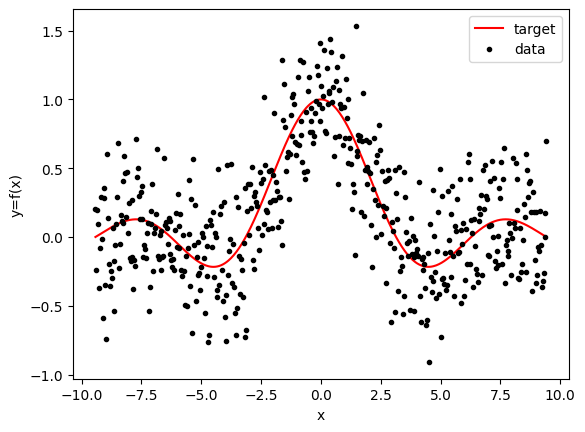

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 500 #número de muestras
X = np.linspace(-3*np.pi,3*np.pi,N) #vector de entrada
y = np.sinc(X/np.pi) #función sinc -> objetivo
var = 0.1 #varianza del ruido
mue = 0 #media del ruido
noise = mue + np.sqrt(var)*np.random.randn(X.shape[0])#ruido blanco
yn = y + noise #señal co ruido
plt.plot(X,y,'r',label='target' )
plt.plot(X,yn,'k.',label='data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

**Nota:** $${\rm{sinc}}(\theta)=\frac{\sin(\theta)}{\theta}$$

- Se crean los vectores de entrada y salida tipo aprendizaje de máquina.

In [2]:
ydata = yn.reshape(-1,1)
Xdata = X.reshape(-1,1)
print(Xdata.shape) # N = 500 muestras, P = 1 atributos
print(ydata.shape) # N = 500, regresion univarida

(500, 1)
(500, 1)


- Se entrenará un modelo de aprendizaje con scikitlearn

0
(350, 1)
(150, 1)


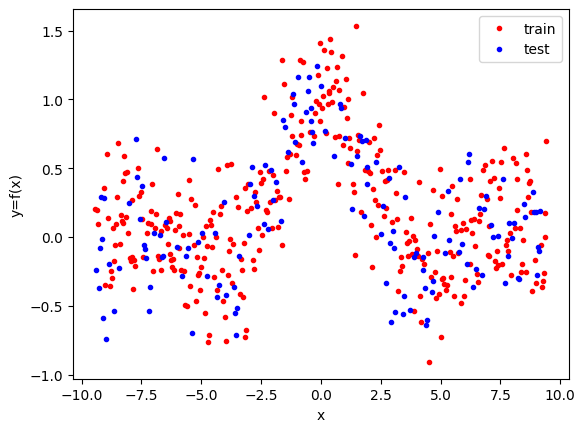

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict,ShuffleSplit

#particionar datos
rs = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for i, (train_i, test_i) in enumerate(rs.split(X)):
   print(i)


X_train, X_test, y_train, y_test = Xdata[train_i], Xdata[test_i], ydata[train_i], ydata[test_i]

print(X_train.shape)
print(X_test.shape)

plt.plot(X_train,y_train,'r.',label='train' )
plt.plot(X_test,y_test,'b.',label='test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

# Kernels y generación de kernels

# Muestreo de Funciones desde Prior y Posterior en Procesos Gaussianos

In [12]:
import matplotlib.pyplot as plt
import numpy as np


def plot_gpr_samples(gpr_model, X, x, n_samples, ax,xlabel_="x",ylabel_="y"):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    X: input samples in N x P
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """


    y_mean, y_std = gpr_model.predict(X, return_std=True) #predicted output from gpr
    y_samples = gpr_model.sample_y(X, n_samples)


    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", lw=2)
    ax.fill_between(
        x,
        y_mean - 2*y_std,
        y_mean + 2*y_std,
        alpha=0.2,
        color="black",
        label=r"$\pm$ 2 std. dev.",
    )
    ax.set_xlabel(xlabel_)
    ax.set_ylabel(ylabel_)
    #ax.set_ylim([-3, 3])

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:357: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


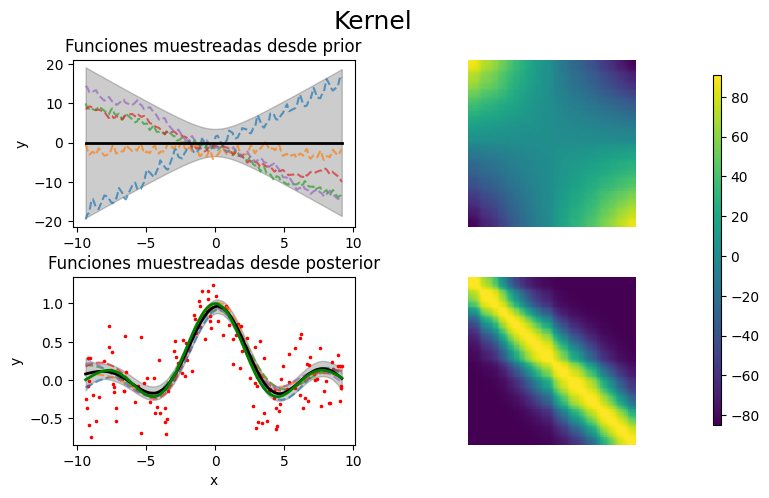

Kernel hiperparametros antes de entrenart:
1**2 * RBF(length_scale=1) + 1**2 * DotProduct(sigma_0=1) + 1**2 * ExpSineSquared(length_scale=1, periodicity=1))


Kernel hiperparametros después de entrenar: 
1**2 * RBF(length_scale=3.21) + 5.35e-05**2 * DotProduct(sigma_0=3.77) + 0.000511**2 * ExpSineSquared(length_scale=9.89e+04, periodicity=1.06) 
Log-likelihood: -97.992




In [13]:
#entrenar gpr
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct,ExpSineSquared, ConstantKernel
import matplotlib


#organizar datos para graficar
ind_ = np.argsort(X_test,axis=0).reshape(-1)

#definir gpr
alpha = 0.1#*1/np.var(y_train)#1e-5
#kernel
kernel = ConstantKernel(constant_value=1.0, constant_value_bounds='fixed')*RBF(length_scale=1,length_scale_bounds=(1e-1, 10.0))+ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*DotProduct(sigma_0=1.0, sigma_0_bounds=(1e-05, 100000.0))+ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*ExpSineSquared(length_scale=1.0, periodicity=1.0, length_scale_bounds=(1e-05, 100000.0), periodicity_bounds=(1e-05, 100000.0))
#crear gpr
gpr = GaussianProcessRegressor(kernel=kernel, alpha=alpha, random_state=0)#crear objeto gpr

fig, axs = plt.subplots(nrows=2,  ncols=2, figsize=(8, 5))

# plot kernel prior
K_prior = kernel(X_test[ind_,0].reshape(-1,1),X_test[ind_,0].reshape(-1,1))
axs[0,1].imshow(K_prior)
axs[0,1].axis('off')

# plot prior
n_samples = 5
plot_gpr_samples(gpr, X_test[ind_,0].reshape(-1,1), X_test[ind_,0].ravel(),
                 n_samples=n_samples, ax=axs[0,0],xlabel_="")
axs[0,0].set_title("Funciones muestreadas desde prior")
#axs[0,0].set_ylim([-2,2])

# plot posterior
gpr.fit(X_train, y_train) #entrenar GPR en train

plot_gpr_samples(gpr,  X_test[ind_,0].reshape(-1,1), X_test[ind_,0].ravel(),
                 n_samples=n_samples, ax=axs[1,0])
axs[1,0].scatter(X_test[ind_, 0], y_test[ind_], color="red",marker='.',s=10)
axs[1,0].plot(X_test[ind_, 0], y[test_i][ind_], color="g",lw=2) #target ytest
axs[1,0].set_title("Funciones muestreadas desde posterior")

# plot kernel posterior después de entrenar
K_posterior = gpr.kernel_(X_test[ind_,0].reshape(-1,1),X_test[ind_,0].reshape(-1,1))
axs[1,1].imshow(K_posterior)
axs[1,1].axis('off')


cax = fig.add_axes([0.925, 0.15, 0.01, 0.7])
norm = matplotlib.colors.Normalize(vmin=min(np.append(K_prior.ravel(),K_posterior.ravel())),
                                   vmax=max(np.append(K_prior.ravel(),K_posterior.ravel())))
sm = plt.cm.ScalarMappable(cmap=None, norm=norm)
#sm.set_array([])
cbar = plt.colorbar(sm,cax=cax)


fig.suptitle("Kernel", fontsize=18)
plt.subplots_adjust(hspace=0.3)
#plt.tight_layout()

plt.show()

print(f"Kernel hiperparametros antes de entrenart:\n{kernel})")
print(
    f"\n\nKernel hiperparametros después de entrenar: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n\n"
)
#

In [6]:
np.exp(gpr.kernel_.theta)#hiperparametros optimizados por el GPR

array([3.20590419e+00, 2.85698262e-09, 3.77307325e+00, 2.61563280e-07,
       9.89129604e+04, 1.05744987e+00])

## Para definir otros tipos de kernel ver [Gaussian Process y Kernels](https://scikit-learn.org/stable/modules/gaussian_process.html)

#Ejercicios

- Pruebe otras combinaciones de kernels para entrenar el regresor.

- Estudie la influencia del hiperparámetro alpha en los resultados.




/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:357: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


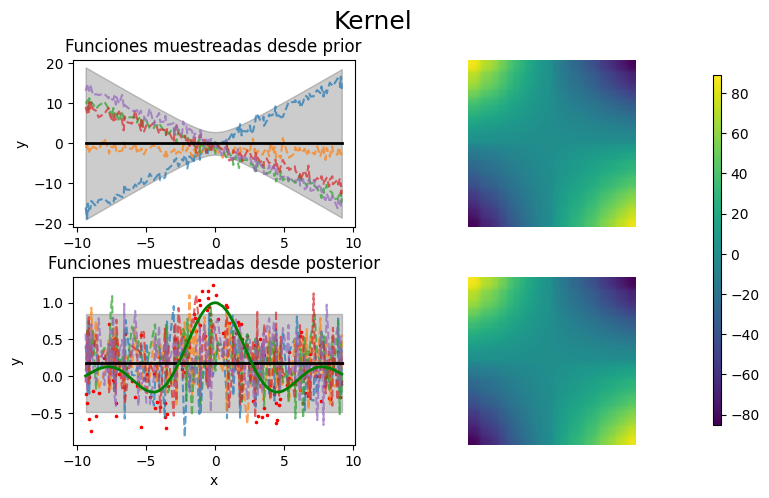

Kernel hiperparametros antes de entrenart:
1**2 * DotProduct(sigma_0=1) + 1**2 * WhiteKernel(noise_level=1))


Kernel hiperparametros después de entrenar: 
3.4e-05**2 * DotProduct(sigma_0=5.43e+03) + 0.331**2 * WhiteKernel(noise_level=1.01) 
Log-likelihood: -226.221




In [26]:
#entrenar gpr
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct,ExpSineSquared, ConstantKernel, WhiteKernel
import matplotlib


#organizar datos para graficar
ind_ = np.argsort(X_test,axis=0).reshape(-1)

#definir gpr
alpha = 0.1#*1/np.var(y_train)#1e-5
#kernel
kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*DotProduct(sigma_0=1.0, sigma_0_bounds=(1e-05, 100000.0))+ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-05, 100000.0))
#crear gpr
gpr = GaussianProcessRegressor(kernel=kernel, alpha=alpha, random_state=0)#crear objeto gpr

fig, axs = plt.subplots(nrows=2,  ncols=2, figsize=(8, 5))

# plot kernel prior
K_prior = kernel(X_test[ind_,0].reshape(-1,1),X_test[ind_,0].reshape(-1,1))
axs[0,1].imshow(K_prior)
axs[0,1].axis('off')

# plot prior
n_samples = 5
plot_gpr_samples(gpr, X_test[ind_,0].reshape(-1,1), X_test[ind_,0].ravel(),
                 n_samples=n_samples, ax=axs[0,0],xlabel_="")
axs[0,0].set_title("Funciones muestreadas desde prior")
#axs[0,0].set_ylim([-2,2])

# plot posterior
gpr.fit(X_train, y_train) #entrenar GPR en train

plot_gpr_samples(gpr,  X_test[ind_,0].reshape(-1,1), X_test[ind_,0].ravel(),
                 n_samples=n_samples, ax=axs[1,0])
axs[1,0].scatter(X_test[ind_, 0], y_test[ind_], color="red",marker='.',s=10)
axs[1,0].plot(X_test[ind_, 0], y[test_i][ind_], color="g",lw=2) #target ytest
axs[1,0].set_title("Funciones muestreadas desde posterior")

# plot kernel posterior después de entrenar
K_posterior = gpr.kernel_(X_test[ind_,0].reshape(-1,1),X_test[ind_,0].reshape(-1,1))
axs[1,1].imshow(K_posterior)
axs[1,1].axis('off')


cax = fig.add_axes([0.925, 0.15, 0.01, 0.7])
norm = matplotlib.colors.Normalize(vmin=min(np.append(K_prior.ravel(),K_posterior.ravel())),
                                   vmax=max(np.append(K_prior.ravel(),K_posterior.ravel())))
sm = plt.cm.ScalarMappable(cmap=None, norm=norm)
#sm.set_array([])
cbar = plt.colorbar(sm,cax=cax)


fig.suptitle("Kernel", fontsize=18)
plt.subplots_adjust(hspace=0.3)
#plt.tight_layout()

plt.show()

print(f"Kernel hiperparametros antes de entrenart:\n{kernel})")
print(
    f"\n\nKernel hiperparametros después de entrenar: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n\n"
)


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:357: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


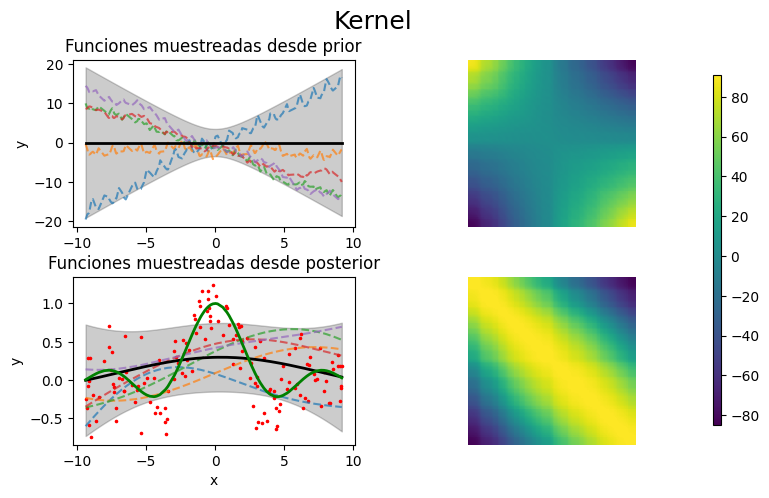

Kernel hiperparametros antes de entrenart:
1**2 * RBF(length_scale=1) + 1**2 * DotProduct(sigma_0=1) + 1**2 * ExpSineSquared(length_scale=1, periodicity=1))


Kernel hiperparametros después de entrenar: 
1**2 * RBF(length_scale=10) + 0.000217**2 * DotProduct(sigma_0=1.64) + 0.00313**2 * ExpSineSquared(length_scale=19.2, periodicity=2.1) 
Log-likelihood: -730.971




In [17]:
#entrenar gpr
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct,ExpSineSquared, ConstantKernel
import matplotlib


#organizar datos para graficar
ind_ = np.argsort(X_test,axis=0).reshape(-1)

#definir gpr
alpha = 10#*1/np.var(y_train)#1e-5
#kernel
kernel = ConstantKernel(constant_value=1.0, constant_value_bounds='fixed')*RBF(length_scale=1,length_scale_bounds=(1e-1, 10.0))+ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*DotProduct(sigma_0=1.0, sigma_0_bounds=(1e-05, 100000.0))+ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*ExpSineSquared(length_scale=1.0, periodicity=1.0, length_scale_bounds=(1e-05, 100000.0), periodicity_bounds=(1e-05, 100000.0))
#crear gpr
gpr = GaussianProcessRegressor(kernel=kernel, alpha=alpha, random_state=0)#crear objeto gpr

fig, axs = plt.subplots(nrows=2,  ncols=2, figsize=(8, 5))

# plot kernel prior
K_prior = kernel(X_test[ind_,0].reshape(-1,1),X_test[ind_,0].reshape(-1,1))
axs[0,1].imshow(K_prior)
axs[0,1].axis('off')

# plot prior
n_samples = 5
plot_gpr_samples(gpr, X_test[ind_,0].reshape(-1,1), X_test[ind_,0].ravel(),
                 n_samples=n_samples, ax=axs[0,0],xlabel_="")
axs[0,0].set_title("Funciones muestreadas desde prior")
#axs[0,0].set_ylim([-2,2])

# plot posterior
gpr.fit(X_train, y_train) #entrenar GPR en train

plot_gpr_samples(gpr,  X_test[ind_,0].reshape(-1,1), X_test[ind_,0].ravel(),
                 n_samples=n_samples, ax=axs[1,0])
axs[1,0].scatter(X_test[ind_, 0], y_test[ind_], color="red",marker='.',s=10)
axs[1,0].plot(X_test[ind_, 0], y[test_i][ind_], color="g",lw=2) #target ytest
axs[1,0].set_title("Funciones muestreadas desde posterior")

# plot kernel posterior después de entrenar
K_posterior = gpr.kernel_(X_test[ind_,0].reshape(-1,1),X_test[ind_,0].reshape(-1,1))
axs[1,1].imshow(K_posterior)
axs[1,1].axis('off')


cax = fig.add_axes([0.925, 0.15, 0.01, 0.7])
norm = matplotlib.colors.Normalize(vmin=min(np.append(K_prior.ravel(),K_posterior.ravel())),
                                   vmax=max(np.append(K_prior.ravel(),K_posterior.ravel())))
sm = plt.cm.ScalarMappable(cmap=None, norm=norm)
#sm.set_array([])
cbar = plt.colorbar(sm,cax=cax)


fig.suptitle("Kernel", fontsize=18)
plt.subplots_adjust(hspace=0.3)
#plt.tight_layout()

plt.show()

print(f"Kernel hiperparametros antes de entrenart:\n{kernel})")
print(
    f"\n\nKernel hiperparametros después de entrenar: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n\n"
)
